# Comparative Analysis of Tesla and GameStop: Stock Prices vs. Revenue

## Question 1: Use yfinance to Extract Tesla Stock Data

In this question, we will use the `yfinance` library to extract Tesla's stock data, reset the index, and display the first five rows of the `tesla_data` dataframe.

```python

In [29]:
import yfinance as yf

### Extracting Tesla Stock Data

In [32]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

### Display the first five rows of the tesla_data dataframe

In [34]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In this question, we will use web scraping to extract Tesla's revenue data from the Macrotrends website and display the last five rows of the tesla_revenue dataframe

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

### Extracting Tesla Revenue Data

In [73]:
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
try:
    response_tesla = requests.get(url_tesla, headers={'User-Agent': 'Mozilla/5.0'})
    response_tesla.raise_for_status()  # Check if the request was successful
    soup_tesla = BeautifulSoup(response_tesla.text, 'html.parser')
    
    # Find the correct table by identifying it with a unique attribute or class
    table = soup_tesla.find('table', {'class': 'historical_data_table table'})
    
    # Check if the table was found
    if table:
        # Read the table into a DataFrame using StringIO
        tesla_revenue = pd.read_html(StringIO(str(table)))[0]
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
        tesla_revenue.dropna(inplace=True)
        tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
        # Display the last five rows of the tesla_revenue dataframe
        tesla_revenue.tail()
    else:
        print("No table found on the webpage.")
except requests.exceptions.RequestException as e:
    print(f"Error fetching Tesla revenue data: {e}")
except ValueError as e:
    print(f"Error processing Tesla revenue data: {e}")

## Question 3: Use yfinance to Extract GameStop Stock Data

In this question, we will use the yfinance library to extract GameStop's stock data, reset the index, and display the first five rows of the gme_data dataframe.

In [53]:
import yfinance as yf

### Extracting GameStop Stock Data

In [56]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

### Display the first five rows of the gme_data dataframe

In [61]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GameStop Revenue Data

In this question, we will use web scraping to extract GameStop's revenue data from the Macrotrends website and display the last five rows of the gme_revenue dataframe.

### Extracting GameStop Revenue Data

In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
url_gamestop = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
try:
    response_gamestop = requests.get(url_gamestop, headers={'User-Agent': 'Mozilla/5.0'})
    response_gamestop.raise_for_status()  # Check if the request was successful
    soup_gamestop = BeautifulSoup(response_gamestop.text, 'html.parser')
    
    # Find the correct table by identifying it with a unique attribute or class
    table = soup_gamestop.find('table', {'class': 'historical_data_table table'})
    
    # Check if the table was found
    if table:
        # Read the table into a DataFrame using StringIO
        gme_revenue = pd.read_html(StringIO(str(table)))[0]
        gme_revenue.columns = ["Date", "Revenue"]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '')
        gme_revenue.dropna(inplace=True)
        gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
        gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
        # Display the last five rows of the gme_revenue dataframe
        gme_revenue.tail()
    else:
        print("No table found on the webpage.")
except requests.exceptions.RequestException as e:
    print(f"Error fetching GameStop revenue data: {e}")
except ValueError as e:
    print(f"Error processing GameStop revenue data: {e}")

## Question 5: Tesla Stock and Revenue Dashboard

In this question, we will create a dashboard to compare Tesla's stock price and revenue using Plotly.

### Creating Tesla Stock and Revenue Dashboard

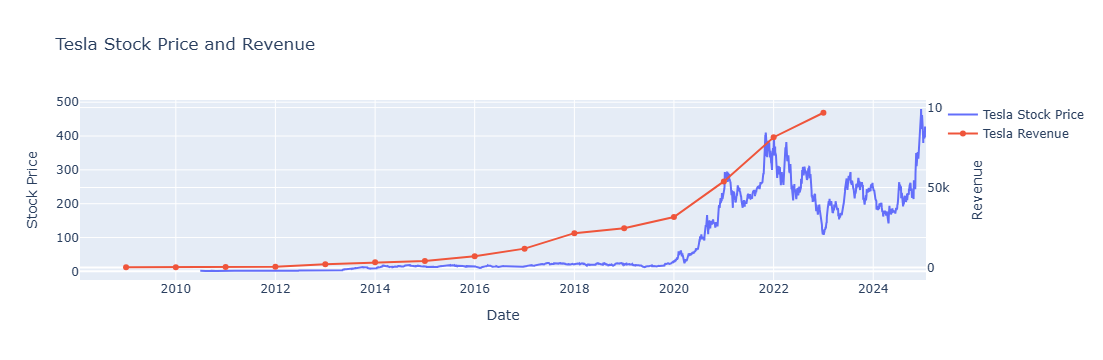

In [86]:
import plotly.graph_objects as go
fig_tesla = go.Figure()
fig_tesla.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name='Tesla Stock Price'))
fig_tesla.add_trace(go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name='Tesla Revenue', yaxis='y2'))
fig_tesla.update_layout(
    title='Tesla Stock Price and Revenue',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price'),
    yaxis2=dict(title='Revenue', overlaying='y', side='right')
)
fig_tesla.show()

## Question 6: GameStop Stock and Revenue Dashboard

In this question, we will create a dashboard to compare GameStop's stock price and revenue using Plotly.

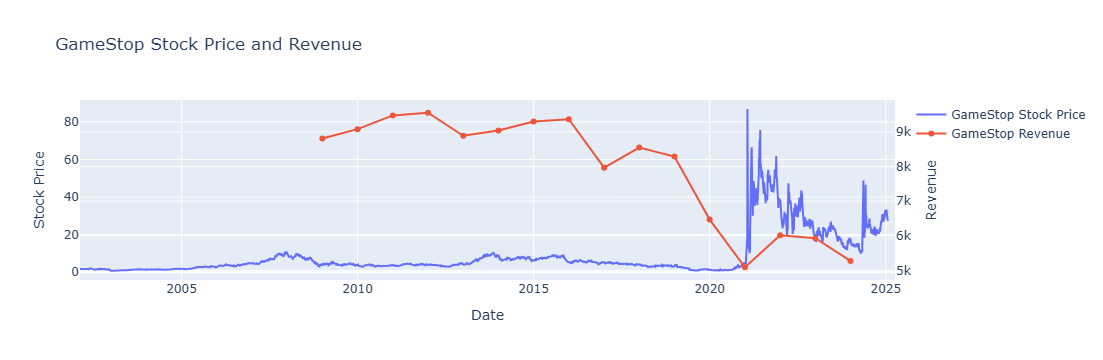

In [92]:
import plotly.graph_objects as go

# Creating GameStop Stock and Revenue Dashboard
fig_gamestop = go.Figure()
fig_gamestop.add_trace(go.Scatter(x=gme_data['Date'], y=gme_data['Close'], name='GameStop Stock Price'))
fig_gamestop.add_trace(go.Scatter(x=gme_revenue['Date'], y=gme_revenue['Revenue'], name='GameStop Revenue', yaxis='y2'))
fig_gamestop.update_layout(
    title='GameStop Stock Price and Revenue',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price'),
    yaxis2=dict(title='Revenue', overlaying='y', side='right')
)
fig_gamestop.show()